In [49]:
# Description: This progamme uses an Artificial recurrent neural network called long Short Term Memory (LSTM)  
#              to predict the closing stock price of a coorperation (Apple Inc.) using the past 60 days stock price.

In [50]:
# import the libraries
import math # extended math module 
import numpy as np # a library for adding support for large, multi-dimensional arrays and matrices.
import pandas as pd # a library for working with and manipulating tabular style data 

import pandas_datareader as web  # package allowing to create a pandas DataFrame object by using various data sources from internet
# DataFrame is a 2d labeled data structure with columns of diff types.
from sklearn.preprocessing import MinMaxScaler # functions and transformer classes to organise raw feature vectors more suitable for 
# downstream estimators. # MinMaxScaler subtracts the minimum value in the feature than divides by the range.
from keras.models import Sequential # keras is a neural network application programming index (API), tightly integrated with TensorFlow used to build machine learning models.
# Sequential model API creates deep learning models where an instance of sequential class is created and model layers are created and added to it.
# achine learning models that input or output data sequences are known as sequence models
from keras.layers import Dense, LSTM # .layers are the basic building blocks of neural networks in Keras. # Dense Layer is the regular deeply connected neural network layer 
# output dimension depends on each input dimension.
import matplotlib.pyplot as plt #  can create a figure, creates a plotting area in a figure, plotes lines in a plotting area.
plt.style.use("fivethirtyeight")

In [51]:
# Get the stock quote 
df = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519283
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586557
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726294
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859336
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838932
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.316826
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.485802
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.389565


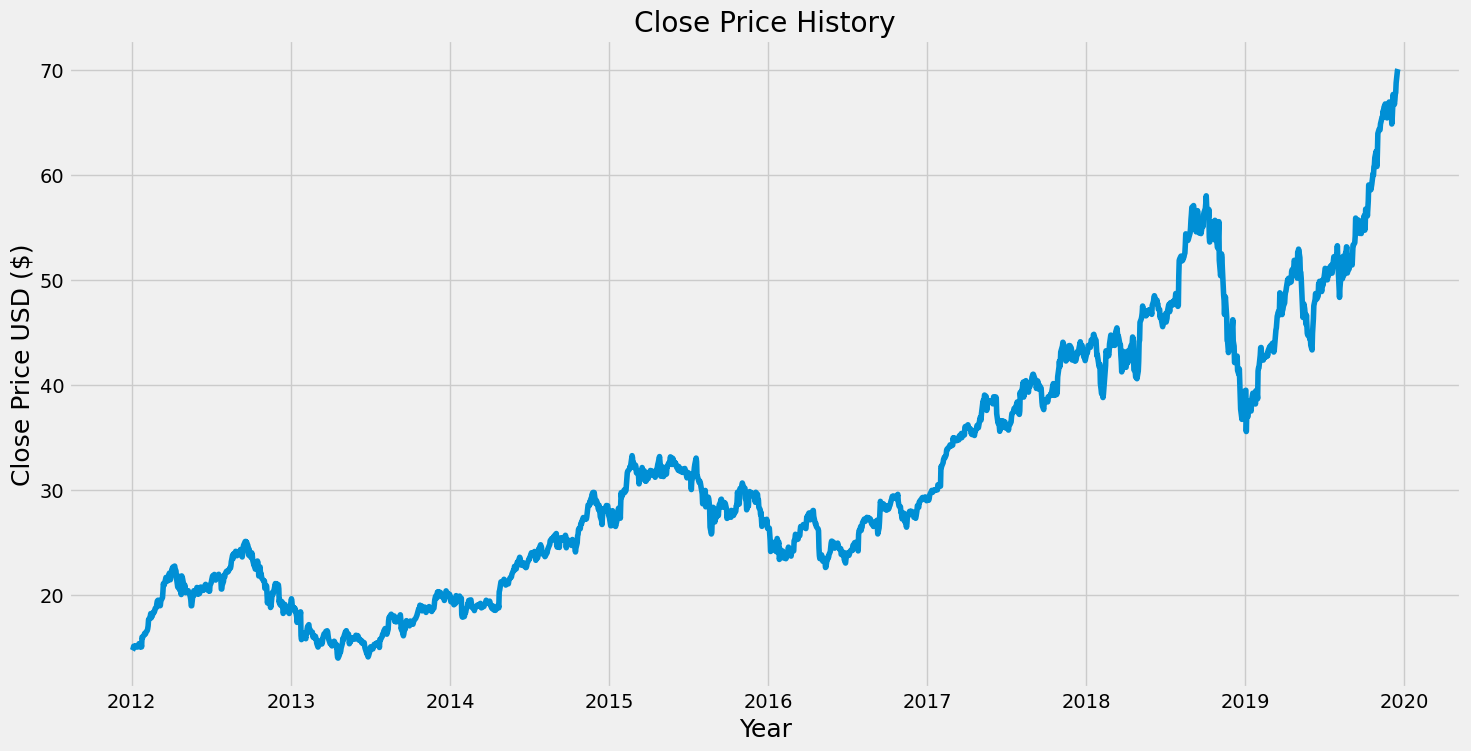

In [52]:
#Visualise the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"]) #Close = closing price
plt.xlabel("Year", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [53]:
#Create a new dataframe with only the "Close Column"
data = df.filter(["Close"])
#Convert the dataframe to a numpy array. # a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8) # training it with 80% of the data that we have

training_data_len

# !
# !
# V that number below is 80% of 2003 since we have 2003 rows

1603

In [54]:
#Scale the data.  transforming your data so that it fits within a specific scale, good practise to do this b4 presenting to a neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [55]:
#create the training data set
#Create the Scaled training data set
train_data = scaled_data[0:training_data_len, :]  # contains all the values from 0 to training data len. # ":"" gets back all of the columns
#Split the data into x_train and y_train data sets
x_train = [] # independent training variables/training features. Each feature, or column, represents a measurable piece of data that can be used for analysis
y_train = [] # dependent variables/target variables. variable whose values are to be modeled and predicted by other variables.

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # column at position 0. # will contain 60 values indexed from pos 0 to 59
    y_train.append(train_data[i, 0]) # will contain the 61st value at position 60
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [56]:
#Converting x_train and y_train to numpy arrays so that we can use them in LSTM models
x_train, y_train = np.array(x_train), np.array(y_train)


In [57]:
#Reshape the data. LSTM model wants 3d array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [58]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1))) # adding a layer to our model. containing LSTM cells as neurons in some of its layers.
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25)) #Dense neaural network with 25 neurons
model.add(Dense(1))

In [59]:
#Compile the model. Compiling a model is required to finalise the model and make it completely ready to use.
model.compile(optimizer="adam", loss="mean_squared_error") # optimiser improves upon the loss function. loss function measures how well the model did on training. 

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1) # fit means train. # batch size means number of training examples given in a training batch
# epochs means the no.of iterations when an entire dataset is passed forward or hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

  26/1543 [..............................] - ETA: 44s - loss: 0.0133

In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # all the values we want our model to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values (x_test)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # scaler rmbr that i passed 2d input with 2 columns, and is like ok the rest cnfrm the same.
# we want predictions to contain the same values as our y_test data set

#predictions = predictions.loc[row_indexer,col_indexer]

In [ ]:
#Get the root mean squared error (RMSE). a measure of how accurate the model predicts the response and the standard deviation of the residuals.
# lower values of RMSE indicate a better fit
rmse = np.sqrt( np.mean( predictions - y_test)**2) # emath standard deviation formula
rmse

In [ ]:
#Plot the data
train = data[:training_data_len] # contains values from index 0 all the way to the end
valid = data[training_data_len:] # index training data len to the end
valid["predictions"] = predictions

#Visualise the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Year", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "predictions"]]) # plotting both actual close price and predictions price
plt.legend(["Train", "Val", "Predictions"], loc="lower right") # loc is location. so location of the legend
plt.show()

#allows the return of specified rows and/or columns from that DataFrame. .loc[row_indexer,col_indexer]

In [ ]:
#Show the valid and predicted prices
valid # since both Close and predictions is inside

In [ ]:
#Get the quote
apple_quote = web.DataReader("AAPL", data_source="yahoo", start="2012-01-01", end="2019-12-17")

#Create a new dataframe
new_df = apple_quote.filter(["Close"])

#Get the last 60 day closing price value and (convert the dataframe to an array, using values)
last_60_days = new_df[-60:].values

#Scale the data to be values btw 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days into empty list X_test
X_test.append(last_60_days_scaled)

#Convert X_test into np array
X_test = np.array(X_test)

#Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  #no.of samples = X_test.shape[0]. no.of time steps = X_test.shape[1]

#Get the predicted scale price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) # predicted price of apple stock on 18 dec 2019

In [ ]:
#Get the quote
apple_quote2 = web.DataReader("AAPL", data_source="yahoo", start="2019-12-18", end="2019-12-18")
print(apple_quote2["Close"])